# Train fully-connected neural networks

I choose linear classifier to make a baseline. For practice, I use 2 versions: 
1. built from scratch linear classifier (written during passing cs231n assignment) with softmax
2. Logistic Regression (written as subclass of pytorch nn.Module) with sigmoid

Both of them used Cross-Entropy loss (`nn.BCELoss()` for the second case). More info in `train_linear_classifier.ipynb`.

Reached accuracies of 2 versions: 
* built from scratch: `0.8033` (cross-validation), `0.7775` (hold data)
* written with  PyTorch: `0.7835` (cross-validation), `0.7846` (hold data)

After I applied a fully-connected neural network (MLP) to achieve better accuracy.

## Import modules

In [21]:
import math
import pickle
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from config import path_to_mean_image
from modules.load_data import load_data
from modules.train_functions import check_accuracy, plot_accs_and_loss, train_nn, cross_validation_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 12.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

path_to_root = '../'
path_to_mean_image = path_to_root + path_to_mean_image

## Load images and apply transformations

Based on cross-validation I chose following transformations:
* `Grayscale`, that converts a RGB-image to grayscale.
* `Resize`, because all input images have different shapes. Resize to [84 x 64] looks correct.
* `ColorJitter`, that randomly changes brightness, contrast and saturation of an image. 
* `RandomHorizontalFlip`, that horizontally flip an image.

In [2]:
spatial_shape = 32
height, width = 84, 64

train_transforms = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((height, width)),
    transforms.ColorJitter(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((height, width)),
    transforms.ColorJitter(),
    transforms.ToTensor(),
])


X_train, y_train = load_data(path_to_root + 'train_data', train_transforms, path_to_mean_image)
X_val, y_val = load_data(path_to_root + 'val_data', train_transforms, path_to_mean_image)
X_hold, y_hold = load_data(path_to_root + 'hold_data', test_transforms, path_to_mean_image)

print(f'X_train has {X_train.shape[0]} samples')
print(f'X_val has {X_val.shape[0]} samples')
print(f'X_hold has {X_hold.shape[0]} samples')

X_train has 15000 samples
X_val has 3000 samples
X_hold has 10000 samples


## Implementation of neural network

In [3]:
class FullyConnectedNN(nn.Module):
    ''' Fully-connected Neural Network with 3 layers, ReLU and sigmoid '''

    def __init__(self, height=84, width=64):
        super(FullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(height * width, 700)
        self.fc2 = nn.Linear(700, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        out = torch.sigmoid(out)
        return out

## Cross-validation

Fold 1 ->
Start training
Epoch [1/15] it 50: loss 0.4940477377176285 - train acc 0.8062999844551086 - val acc 0.7914000153541565
Epoch [2/15] it 50: loss 0.3865140545368195 - train acc 0.833899974822998 - val acc 0.8131999969482422
Epoch [3/15] it 50: loss 0.33429537862539294 - train acc 0.8646000027656555 - val acc 0.8294000029563904
Epoch [4/15] it 50: loss 0.3109672731161118 - train acc 0.8675000071525574 - val acc 0.8217999935150146
Epoch [5/15] it 50: loss 0.2711279132962227 - train acc 0.8978000283241272 - val acc 0.8425999879837036
Epoch [6/15] it 50: loss 0.2296387904882431 - train acc 0.9128999710083008 - val acc 0.8429999947547913
Epoch [7/15] it 50: loss 0.19928781807422638 - train acc 0.9358999729156494 - val acc 0.8465999960899353
Epoch [8/15] it 50: loss 0.16401363745331765 - train acc 0.9366000294685364 - val acc 0.8424000144004822
Epoch [9/15] it 50: loss 0.15171774923801423 - train acc 0.9363999962806702 - val acc 0.8396000266075134
Epoch [10/15] it 50: loss 0.13794551

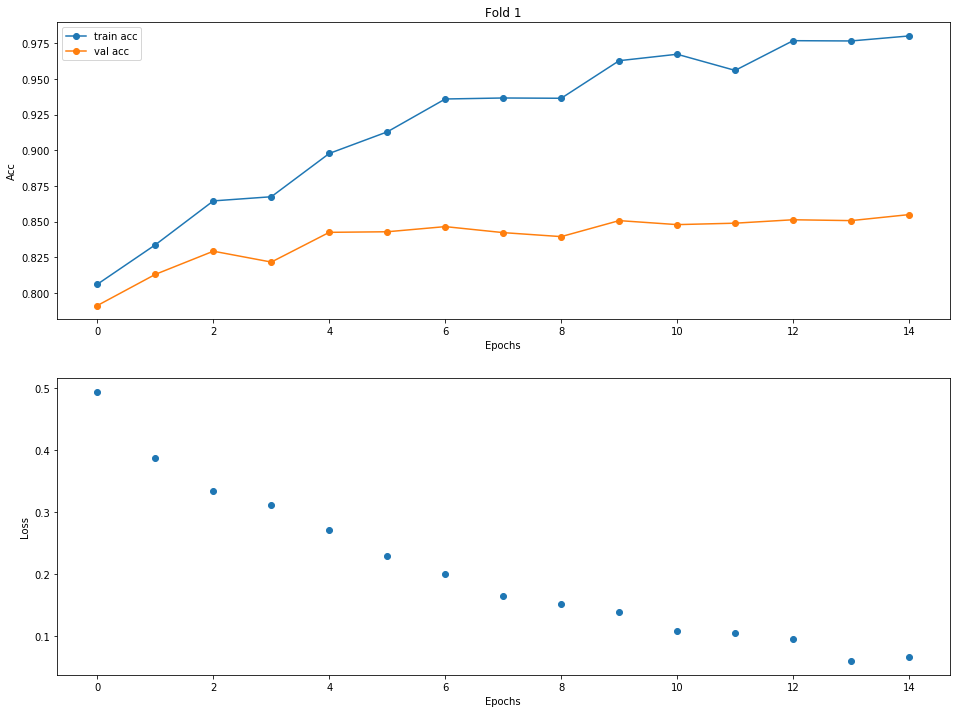

Fold 2 ->
Start training
Epoch [1/15] it 50: loss 0.4760630053281784 - train acc 0.8187999725341797 - val acc 0.7973999977111816
Epoch [2/15] it 50: loss 0.3866467666625977 - train acc 0.8174999952316284 - val acc 0.7924000024795532
Epoch [3/15] it 50: loss 0.3454879343509674 - train acc 0.857200026512146 - val acc 0.819599986076355
Epoch [4/15] it 50: loss 0.310457227230072 - train acc 0.8823000192642212 - val acc 0.8294000029563904
Epoch [5/15] it 50: loss 0.2723677039146423 - train acc 0.9035999774932861 - val acc 0.8357999920845032
Epoch [6/15] it 50: loss 0.23208876460790634 - train acc 0.9215999841690063 - val acc 0.8420000076293945
Epoch [7/15] it 50: loss 0.19073127090930939 - train acc 0.9311000108718872 - val acc 0.8446000218391418
Epoch [8/15] it 50: loss 0.17605893164873124 - train acc 0.9312999844551086 - val acc 0.8432000279426575
Epoch [9/15] it 50: loss 0.15374714031815528 - train acc 0.9484999775886536 - val acc 0.8483999967575073
Epoch [10/15] it 50: loss 0.1125333106

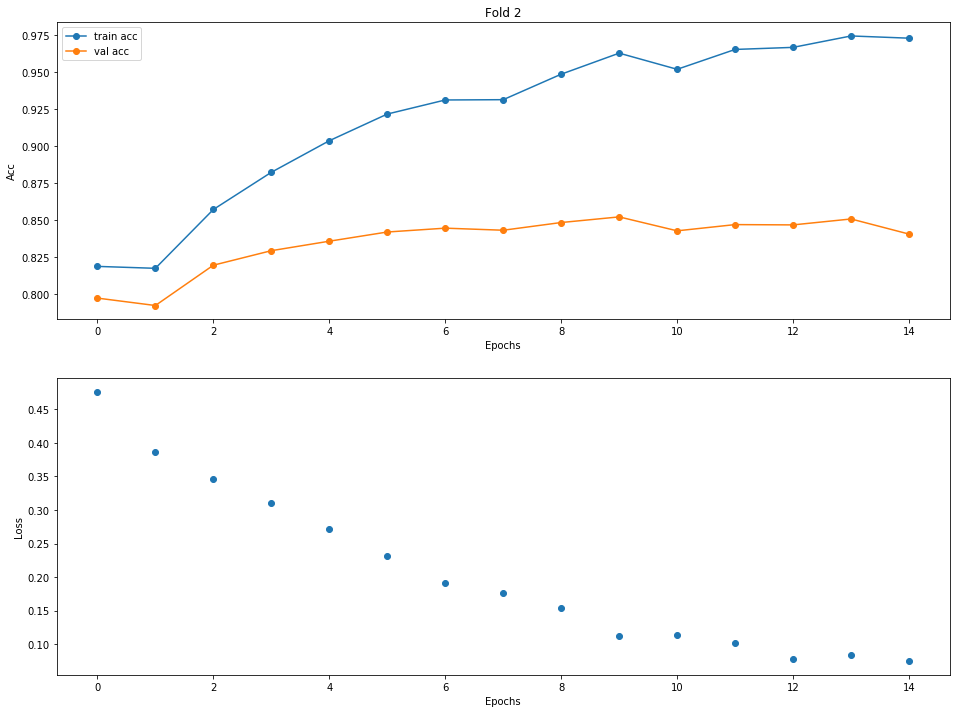

Fold 3 ->
Start training
Epoch [1/15] it 50: loss 0.4963331115245819 - train acc 0.7985000014305115 - val acc 0.7922000288963318
Epoch [2/15] it 50: loss 0.3933966737985611 - train acc 0.8342000246047974 - val acc 0.8180000185966492
Epoch [3/15] it 50: loss 0.3503320360183716 - train acc 0.8522999882698059 - val acc 0.8087999820709229
Epoch [4/15] it 50: loss 0.31340724021196364 - train acc 0.8737999796867371 - val acc 0.826200008392334
Epoch [5/15] it 50: loss 0.2633311912417412 - train acc 0.9003000259399414 - val acc 0.8385999798774719
Epoch [6/15] it 50: loss 0.23736431151628495 - train acc 0.9143999814987183 - val acc 0.8388000130653381
Epoch [7/15] it 50: loss 0.20529240161180495 - train acc 0.9287999868392944 - val acc 0.8435999751091003
Epoch [8/15] it 50: loss 0.17472729668021203 - train acc 0.946399986743927 - val acc 0.850600004196167
Epoch [9/15] it 50: loss 0.16447337687015534 - train acc 0.9380999803543091 - val acc 0.8414000272750854
Epoch [10/15] it 50: loss 0.135349217

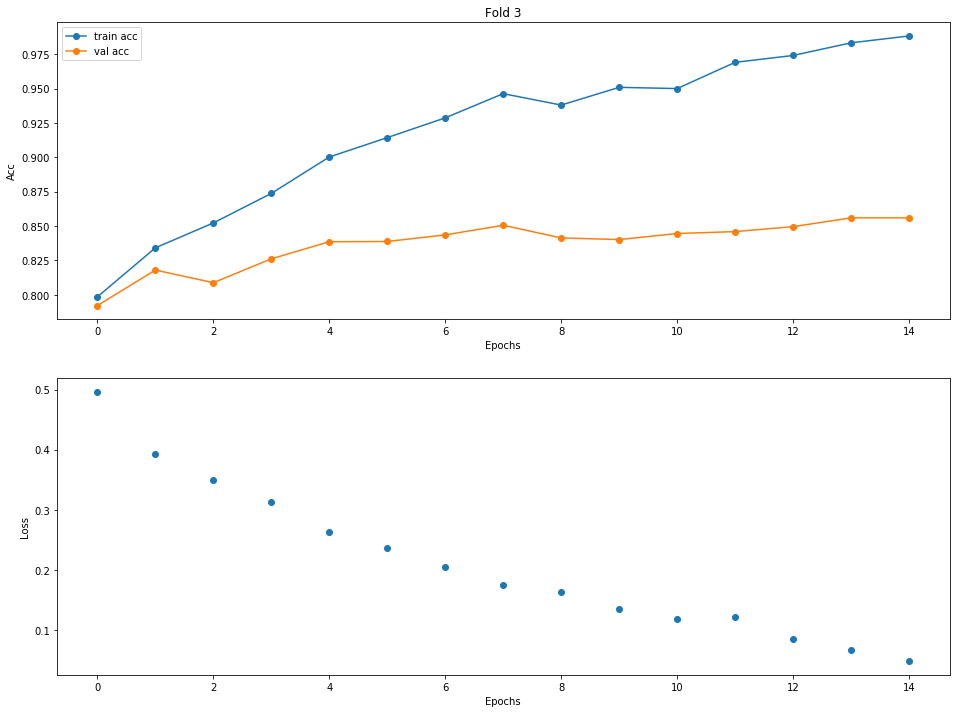

CPU times: user 6min 52s, sys: 11 s, total: 7min 3s
Wall time: 1min 46s


In [13]:
%%time
torch.manual_seed(777)
val_results = cross_validation_score(FullyConnectedNN, X_train, y_train, num_folds=3, num_epochs=15)

In [14]:
print(val_results)
print(np.mean(val_results))
print(np.std(val_results))

[0.8550000190734863, 0.8521999716758728, 0.8560000061988831]
0.8543999989827474
0.0016083290865543678


## Create and train model with selected hyperparameters

In [16]:
net = FullyConnectedNN()
if torch.cuda.is_available():
    net = net.cuda()

criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=1e-3, betas=(0.9, 0.999))

train_parameters = {
    'model': net,
    'criterion': criterion,
    'optimizer': optimizer
}

In [17]:
%%time
torch.manual_seed(777)

results, best_val = train_nn(train_parameters, X_train, y_train, X_val, y_val, 
                             num_epochs=15, checkpoint_filename=path_to_root + 'models/fc_nn_3layers.pth')

Start training
Epoch [1/15] it 300: loss 0.4401977771520615 - train acc 0.8280666470527649 - val acc 0.8320000171661377
Epoch [2/15] it 300: loss 0.3522537423173587 - train acc 0.8556666374206543 - val acc 0.8356666564941406
Epoch [3/15] it 300: loss 0.3138998846213023 - train acc 0.8614000082015991 - val acc 0.8456666469573975
Epoch [4/15] it 300: loss 0.2739934524397055 - train acc 0.896133303642273 - val acc 0.8643333315849304
Epoch [5/15] it 300: loss 0.23973793360094228 - train acc 0.9070000052452087 - val acc 0.8569999933242798
Epoch [6/15] it 300: loss 0.19868394653002422 - train acc 0.9304666519165039 - val acc 0.8766666650772095
Epoch [7/15] it 300: loss 0.18298314085851114 - train acc 0.9232000112533569 - val acc 0.8659999966621399
Epoch [8/15] it 300: loss 0.15618271934489408 - train acc 0.9345999956130981 - val acc 0.8696666955947876
Epoch [9/15] it 300: loss 0.1345877160007755 - train acc 0.9369333386421204 - val acc 0.8619999885559082
Epoch [10/15] it 300: loss 0.11943022

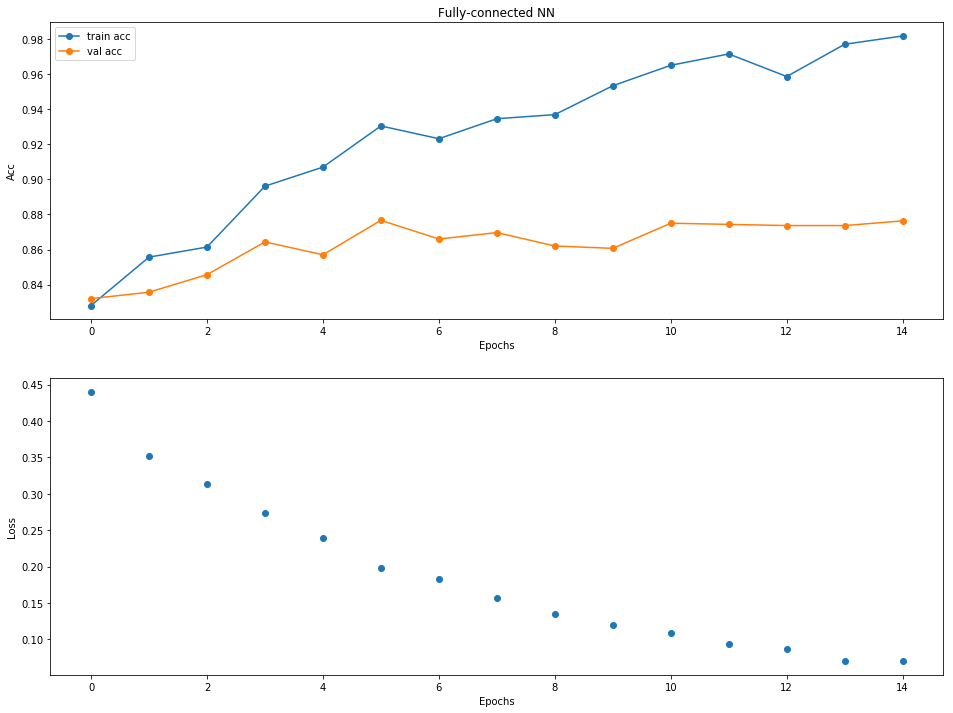

In [18]:
plot_accs_and_loss(results, 'Fully-connected NN')

## Load the best model and try it on the hold data

In [19]:
best_fc_nn = FullyConnectedNN()
best_fc_nn.load_state_dict(torch.load(path_to_root + 'models/fc_nn_3layers.pth'))

<All keys matched successfully>

In [20]:
%%time
check_accuracy(best_fc_nn, X_hold, y_hold)

CPU times: user 963 ms, sys: 25.6 ms, total: 988 ms
Wall time: 256 ms


0.8568999767303467

## Conclusion:

Fully-connected neural network got higher accuracy (in compare with the linear classifier) with still a short training time. 

The best result during cross-validation is `0.8767`. And on hold (unseen) data net reached `0.8569` score.